<a href="https://colab.research.google.com/github/Thisuli-Amanethmi/VoiceVoyage/blob/Thisuli/YOLOv8_CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!nvidia-smi

Sun Jan 28 22:18:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

In [ ]:
!pip install --upgrade ultralytics


In [10]:
!pip install ultralytics==8.0.196


In [11]:
# INSTALL YOLOv8

from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
!yolo checks


**Train YOLOv8 Model on Custom Dataset**

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RRPASSpBZTefA9CAlVWa")
project = rf.workspace("dsgp-8kqpx").project("voice-voyage")
dataset = project.version(3).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [14]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Voice-Voyage-3/data.yaml epochs=100 imgsz=640


New https://pypi.org/project/ultralytics/8.1.6 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Voice-Voyage-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fal

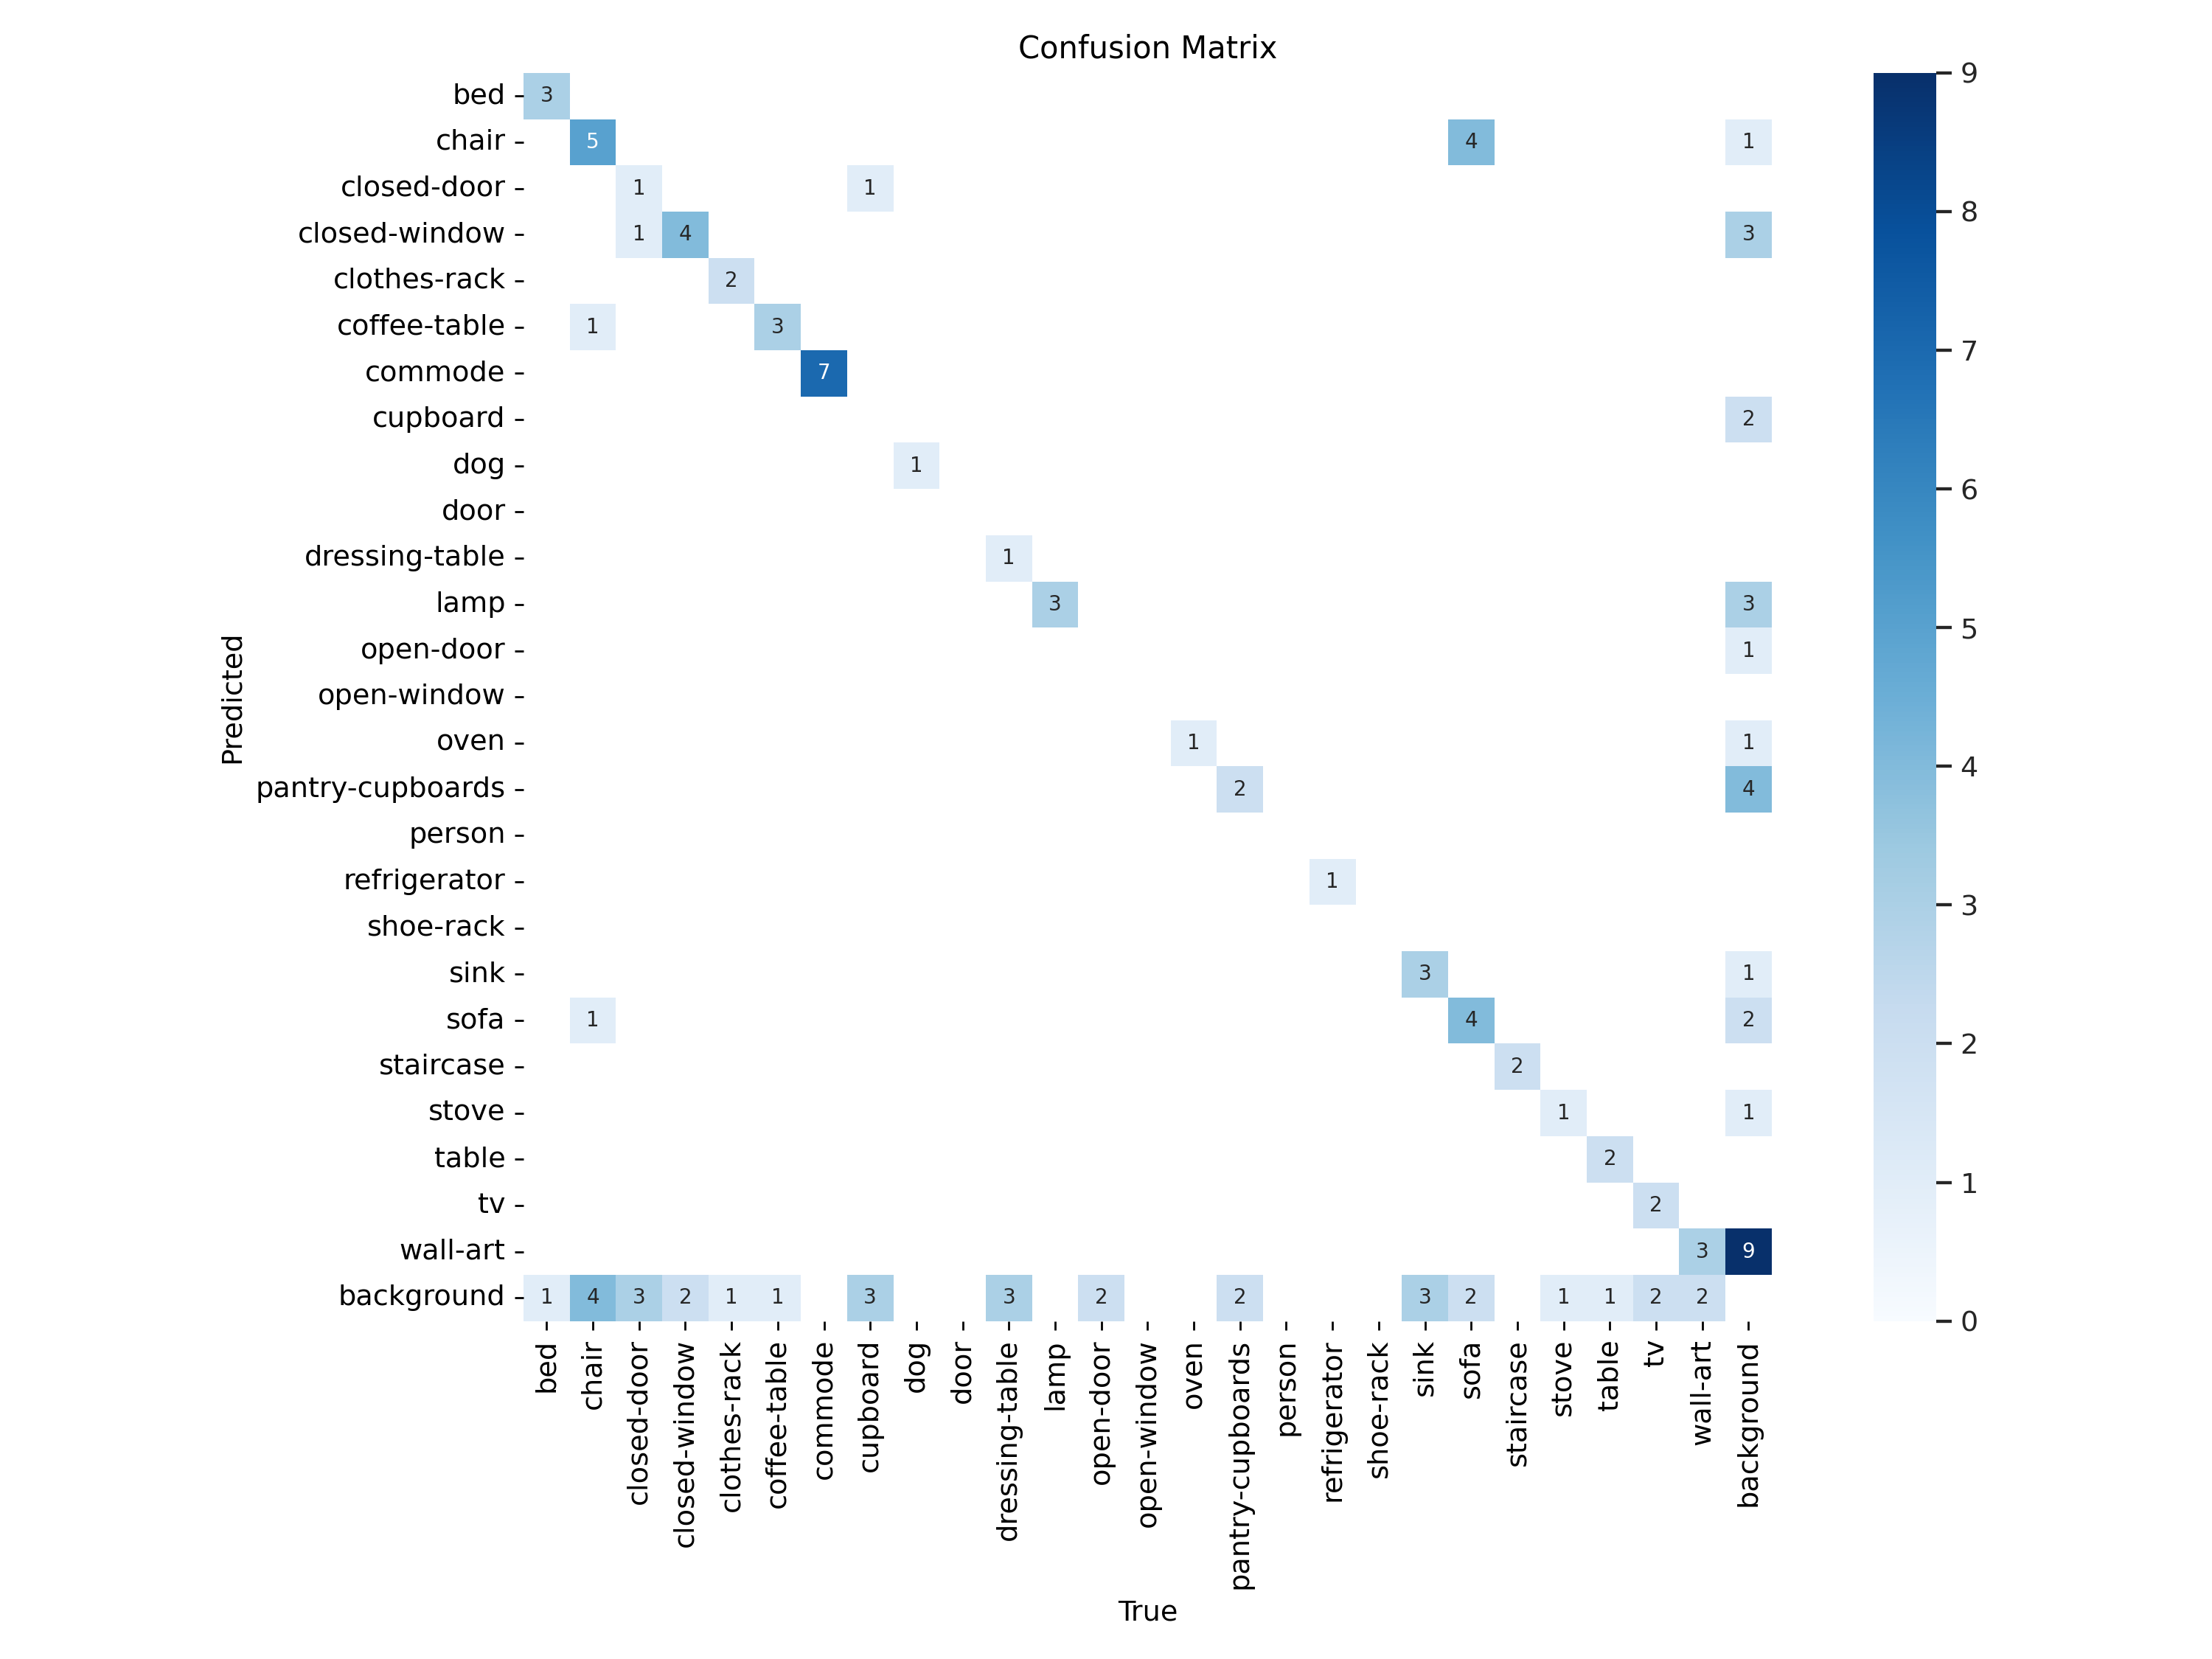

In [15]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width=600)


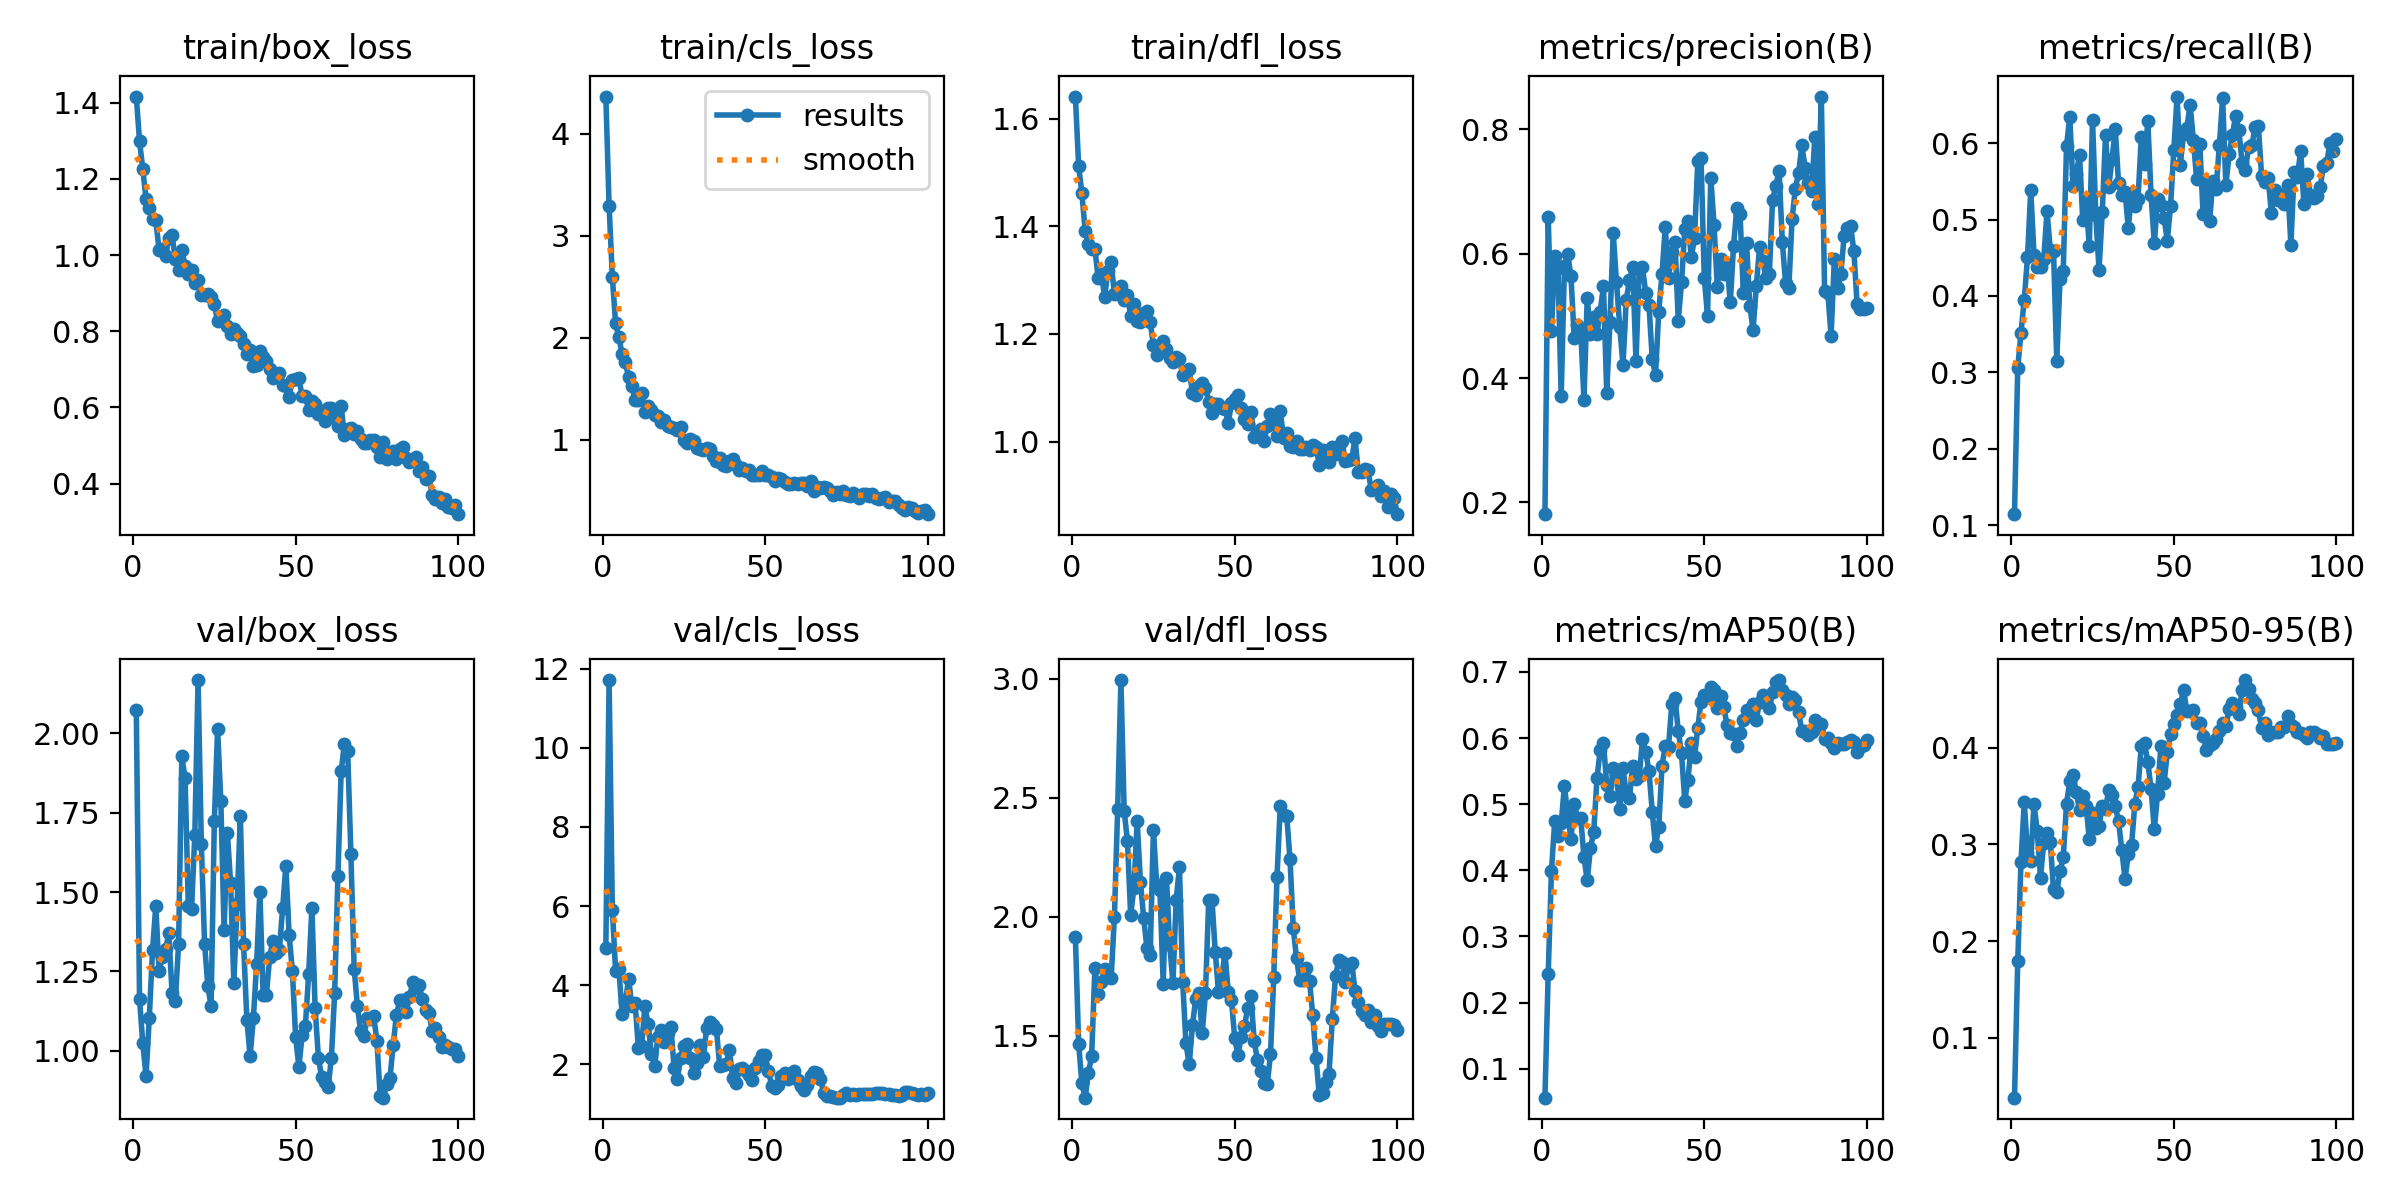

In [17]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)


In [19]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854814 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/Voice-Voyage-3/valid/labels.cache... 33 images, 1 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.54s/it]
                   all         33         92       0.71      0.565      0.685      0.468
                   bed         33          4          1      0.626      0.995      0.492
                 chair         33         11      0.455      0.364      0.472      0.364
           closed-door         33          5       0.69        0.2      0.343      0.235
         closed-window         33          6      0.672      0.667      0.662      0.532
          clothes-rack         33          3      0.453      0.333      0.731      0.428
          coffee-table         33          4    

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml source='/content/runs/detect/predict/OIP.jpeg'


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml source='/content/runs/detect/predict/R (1).jpeg'


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml source='/content/runs/detect/predict/dining room (2).jpg'


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpeg'):
  display(Image(filename=image_path, height=600))
  print("\n")


In [26]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml source='/content/runs/detect/predict/OIP.jpeg'
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml source='/content/runs/detect/predict/R (1).jpeg'
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt data=/content/Voice-Voyage-3/data.yaml source='/content/runs/detect/predict/dining room (2).jpg'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854814 parameters, 0 gradients, 78.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/runs/detect/predict/OIP.jpeg: 448x640 3 chairs, 1 sofa, 1 table, 1 wall-art, 203.0ms
Speed: 4.8ms preprocess, 203.0ms inference, 832.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854814 parameters, 0 gradients, 78.8 GFLOPs

image 1/1 /content/runs/detect/predict/R (1).jpeg: 544x640 1 bed, 113.0ms
Speed: 5.1ms preprocess, 113.0ms inference, 566.5ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torc

In [27]:
import os
import shutil

# Define the paths
prediction_folders = ['runs/detect/predict5', 'runs/detect/predict6', 'runs/detect/predict7']
output_folder = 'all_predictions'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each prediction folder
for folder in prediction_folders:
    # Get the list of files in the prediction folder
    files = os.listdir(folder)

    # Move or copy each file to the output folder
    for file in files:
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            # You can choose to move or copy the file
            # shutil.move(file_path, output_folder)  # Move
            shutil.copy(file_path, output_folder)  # Copy

print("All predictions are gathered in the folder:", output_folder)


All predictions are gathered in the folder: all_predictions


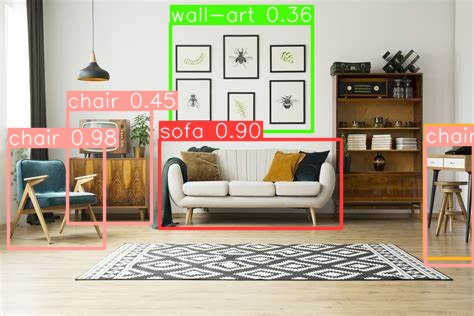

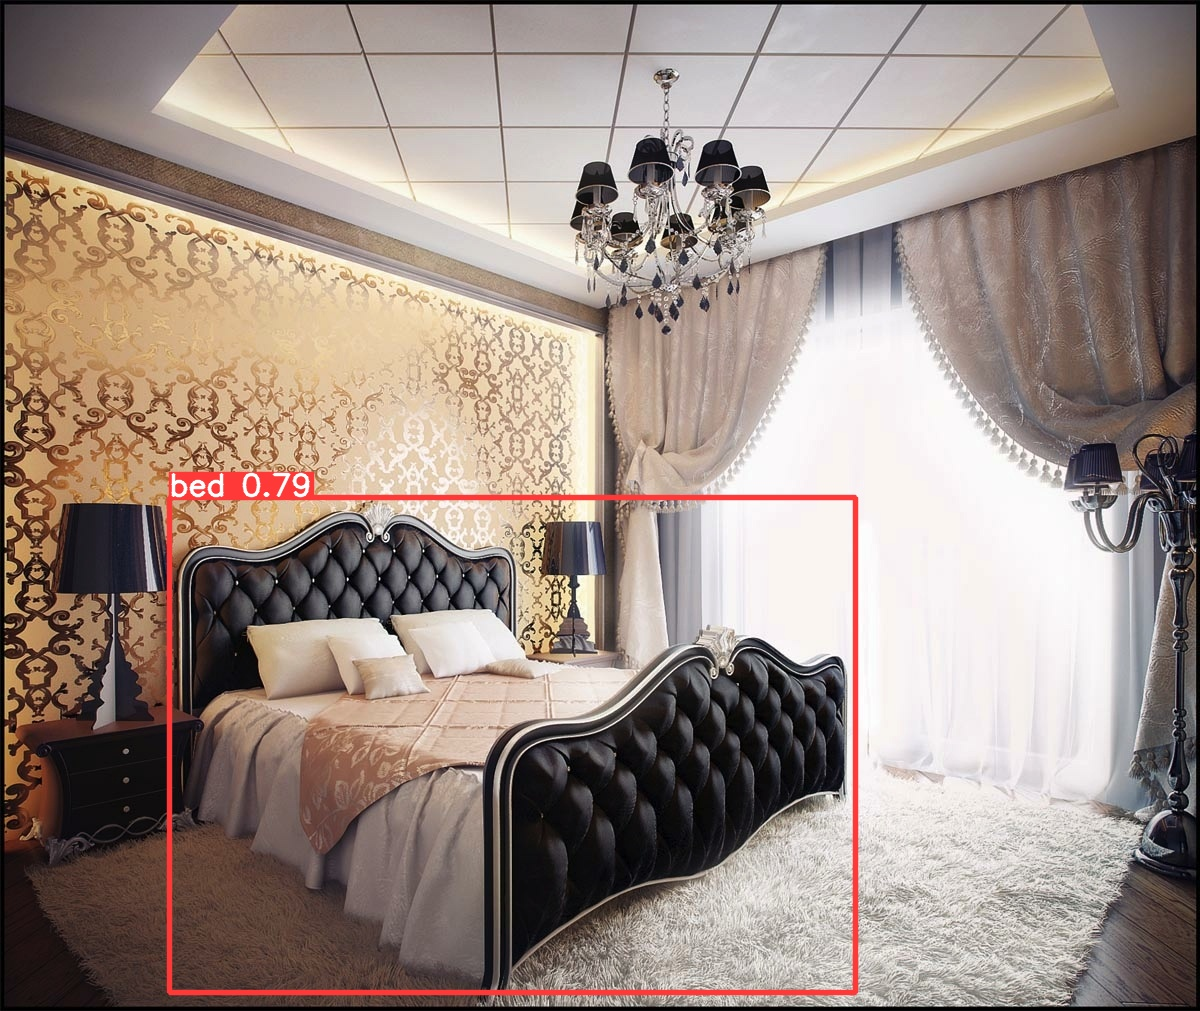

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/all_predictions/*.jpeg'):
  display(Image(filename=image_path, height=600))
  print("\n")